# PART 1: Modelling point neurons

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## 1. Hodgkin-Huxley model

### <b>(a)</b> `(1 point)` 
#### Plot $x_{∞}$(V) and $τ_{x}$(V) for the state variables n, m, h and explain briefly their physiological meaning.

In [38]:
# We create an array of values for voltage
V = np.linspace(-40, 100, 10000)

In [39]:
V[0:5]

array([-40.       , -39.9859986, -39.9719972, -39.9579958, -39.9439944])

In [48]:
# First, we compute the alphas and betas
alpha_n = 0.01*(10-V)/(np.exp((10-V)/(10))-1)
alpha_m = 0.1*(25-V)/(np.exp((25-V)/(10))-1)
alpha_h = 0.07*np.exp(-V/20)
beta_n = 0.125*np.exp(-V/80)
beta_m = 4*np.exp(-V/18)
beta_h = (1)/(np.exp((30-V)/(10))+1)

In [49]:
# Then, we compute the x and tau values
n_inf = alpha_n/(alpha_n+beta_n)
m_inf = alpha_m/(alpha_m+beta_m)
h_inf = alpha_h/(alpha_h+beta_h)
tau_n = 1/(alpha_n+beta_n)
tau_m = 1/(alpha_m+beta_m)
tau_h = 1/(alpha_h+beta_h)

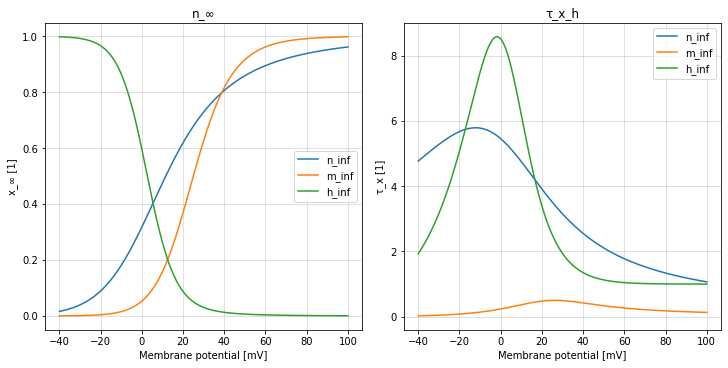

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 5))
ax = ax.ravel()

ax[0].plot(V, n_inf)
ax[0].plot(V, m_inf)
ax[0].plot(V, h_inf)
ax[1].plot(V, tau_n)
ax[1].plot(V, tau_m)
ax[1].plot(V, tau_h)

titles = ["n_∞", "τ_x_h"]

for i in range(2):
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('Membrane potential [mV]')
    ax[i].title.set_text(titles[i])
ax[0].set_ylabel('x_∞ [1]');
ax[0].legend(["n_inf", "m_inf", "h_inf"])
ax[1].set_ylabel('τ_x [1]');
ax[1].legend(["n_inf", "m_inf", "h_inf"])

### <b>(b)</b> `(1 point)` 
#### Check that if I = 0 the neuron goes to a resting state and describe the regime values of the state variables

In [266]:
I = 0
gK = 36
EK = -12
gNa =120
ENa = 120
gL = 0.3
EL = 10.6
C = 1

In [267]:
def model(y0, t):
    
    n = y0[0]
    m = y0[1]
    h = y0[2]
    V = y0[3]
    
    alpha_n = 0.01*(10-V)/(np.exp((10-V)/(10))-1)
    alpha_m = 0.1*(25-V)/(np.exp((25-V)/(10))-1)
    alpha_h = 0.07*np.exp(-V/20)
    beta_n = 0.125*np.exp(-V/80)
    beta_m = 4*np.exp(-V/18)
    beta_h = (1)/(np.exp((30-V)/(10))+1)
    
    V_point = (I-gK*n**4*(V-EK)-gNa*m**3*h*(V-ENa)-gL*(V-EL))/C
    n_point = alpha_n*(1-n)-beta_n*n
    m_point = alpha_m*(1-m)-beta_m*m
    h_point = alpha_h*(1-h)-beta_h*h
    
    dfdt = [n_point, m_point, h_point, V_point]
    
    return dfdt

In [268]:
t = np.linspace(0,40,101)

In [269]:
soln = odeint(model, [int(n), int(m), int(h), int(V)], t)
ns = list()
ms = list()
hs = list()
Vs = list()
    
ns = soln[:,0]
ms = soln[:,1]
hs = soln[:,2]
Vs = soln[:,3]

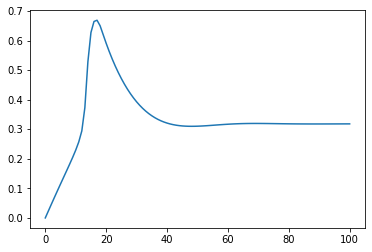

In [270]:
plt.plot(ns)

[0.37454012] [0.95071431] [0.73199394] [0.59865848]
[0.15601864] [0.15599452] [0.05808361] [0.86617615]
[0.60111501] [0.70807258] [0.02058449] [0.96990985]
[0.83244264] [0.21233911] [0.18182497] [0.18340451]
[0.30424224] [0.52475643] [0.43194502] [0.29122914]
[0.61185289] [0.13949386] [0.29214465] [0.36636184]
[0.45606998] [0.78517596] [0.19967378] [0.51423444]
[0.59241457] [0.04645041] [0.60754485] [0.17052412]
[0.06505159] [0.94888554] [0.96563203] [0.80839735]
[0.30461377] [0.09767211] [0.68423303] [0.44015249]
[0.12203823] [0.49517691] [0.03438852] [0.9093204]


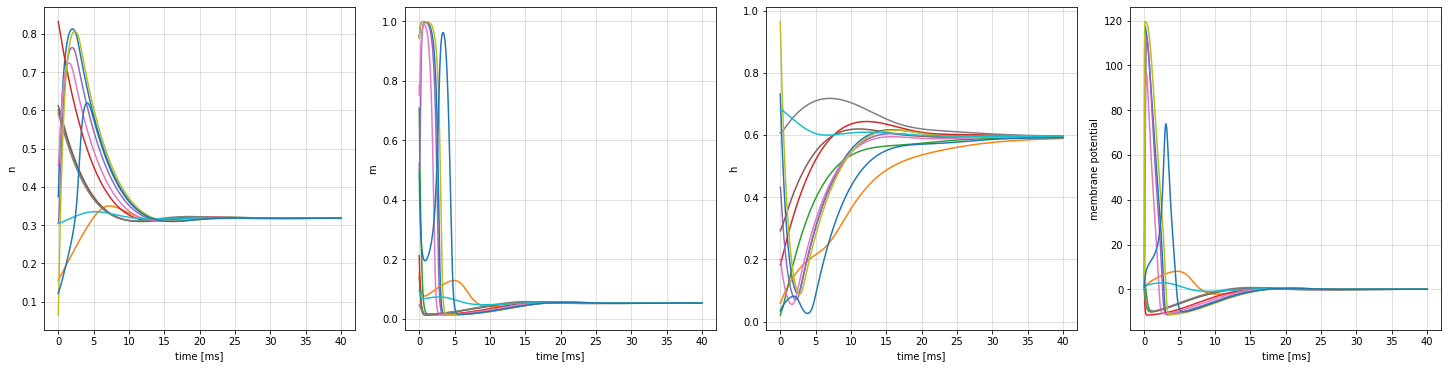

In [271]:
fig, ax = plt.subplots(nrows=1, ncols=4, constrained_layout=True, figsize=(20, 5))
ax = ax.ravel()

titles = ["n", "m", "h", "membrane potential"]

t = np.array(range(1,40000))*0.001

np.random.seed(42)

n_random = [0.12, 0.24, 0.36, 0.25, 0.28, 0.75, 0.84, 0.46, 0.65, 0.25]
m_random = [0.02, 0.45, 0.65, 0.23, 0.32, 0.75, 0.64, 0.85, 0.48, 0.85]
h_random = [0.42, 0.16, 0.59, 0.75, 0.85, 0.85, 0.62, 0.15, 0.23, 0.97]
#V_random = 

for j in range(1,12):
    n = np.random.random(1).astype(float)
    m = np.random.random(1).astype(float)
    h = np.random.random(1).astype(float)
    V = np.random.random(1).astype(float)
    y0 = np.array([n,m,h,V]).reshape(-1)
    
    
    print(n,m,h,V)
    
    ns = list()
    ms = list()
    hs = list()
    Vs = list()
    
    soln = odeint(model, y0, t)

    ns = soln[:,0]
    ms = soln[:,1]
    hs = soln[:,2]
    Vs = soln[:,3]

    ax[0].plot(t,ns)
    ax[1].plot(t,ms)
    ax[2].plot(t,hs)
    ax[3].plot(t,Vs)

for i in range(4):
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('time [ms]')
    ax[i].set_ylabel(titles[i])


### <b>(c)</b> `(2 points)`  
#### Stimulate the neuron model with intracellular single-pulse currents 
#### $$ I(t) =
  \begin{cases}
    A       & \quad \text{if } t_{i} < t \leq t_{i}+PW \\
    0  & \quad \text{otherwise}
  \end{cases} $$  
#### (choose $t_{i}$ > 0). Provide a set of simulations showing that the activation of the neuron depends from the quantity Q = A · PW and interpret the found dependency (it is sufficient to fix a couple of values for A and to perform a sweep of the variable PW).

In [136]:
I = 0

In [256]:
def model1c(y0,t):
    n = y0[0]
    m = y0[1]
    h = y0[2]
    V = y0[3]
    alpha_n = 0.01*(10-V)/(np.exp((10-V)/(10))-1)
    alpha_m = 0.1*(25-V)/(np.exp((25-V)/(10))-1)
    alpha_h = 0.07*np.exp(-V/20)
    beta_n = 0.125*np.exp(-V/80)
    beta_m = 4*np.exp(-V/18)
    beta_h = (1)/(np.exp((30-V)/(10))+1)
    
    if 5<t<5+PW:
        I = 10
    else:
        I = 0
    V_point = (I-gK*n**4*(V-EK)-gNa*m**3*h*(V-ENa)-gL*(V-EL))/C
    n_point = alpha_n*(1-n)-beta_n*n
    m_point = alpha_m*(1-m)-beta_m*m
    h_point = alpha_h*(1-h)-beta_h*h
    
    dfdt = [n_point, m_point, h_point, V_point]
    
    return dfdt

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


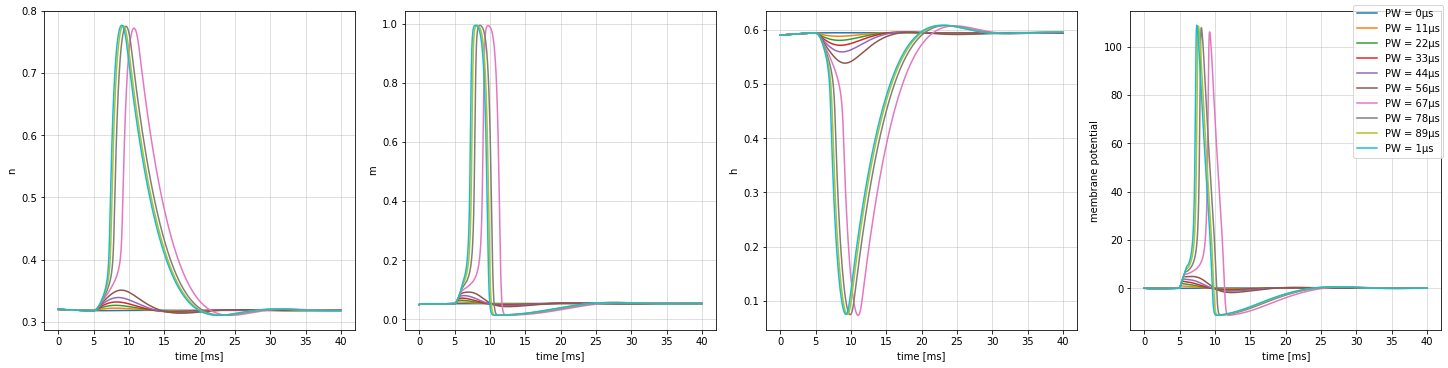

In [259]:
fig, ax = plt.subplots(nrows=1, ncols=4, constrained_layout=True, figsize=(20, 5))
ax = ax.ravel()

titles = ["n", "m", "h", "membrane potential"]

t = np.array(range(1,400000))*0.0001

np.random.seed(15)

n_eq = 0.32
m_eq = 0.05
h_eq = 0.59
V_eq = 0

y0 = np.array([n_eq,m_eq,h_eq,V_eq]).reshape(-1)

ns = list()
ms = list()
hs = list()
Vs = list()

PWs = np.linspace(0, 1, 10)

for PW in PWs:

    print(PW)
    soln = odeint(model1c, y0, t)

    ns = soln[:,0]
    ms = soln[:,1]
    hs = soln[:,2]
    Vs = soln[:,3]

    ax[0].plot(t,ns)
    ax[1].plot(t,ms)
    ax[2].plot(t,hs)
    ax[3].plot(t,Vs)


for i in range(4):
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('time [ms]')
    ax[i].set_ylabel(titles[i])
fig.legend(["PW = 0µs", "PW = 11µs","PW = 22µs","PW = 33µs","PW = 44µs","PW = 56µs","PW = 67µs","PW = 78µs","PW = 89µs","PW = 1µs"])


## 2. Morris-Lecar model

### <b>(a)</b> `(3 points)` 
#### Stimulate the neuron model with step currents $$ I(t) = \begin{cases}  A       & \quad \text{if } t \geq t_{i} \\  0  & \quad \text{otherwise}   \end{cases} $$ for A = [0,12,20,40,150,300,400] $\mu A / cm^{2}$ and plot the time-course of the model state variables as well as the phase plot with the state variable nullsclines.

In [272]:
I = 0
EL = -78
gL = 8
ENa = 60
gNa = 20
EK = -90
gK = 10
m_inf = -20
m_k = 15
n_inf = -45
n_k = 5
tau = 1
C = 1

In [ ]:
def model2a(y0,t):
    n = y0[0]
    m = y0[1]
    h = y0[2]
    V = y0[3]
    alpha_n = 0.01*(10-V)/(np.exp((10-V)/(10))-1)
    alpha_m = 0.1*(25-V)/(np.exp((25-V)/(10))-1)
    alpha_h = 0.07*np.exp(-V/20)
    beta_n = 0.125*np.exp(-V/80)
    beta_m = 4*np.exp(-V/18)
    beta_h = (1)/(np.exp((30-V)/(10))+1)
    
    if 5<t<5+PW:
        I = 10
    else:
        I = 0
    V_point = (I-gK*n*(V-EK)-gNa*m*h*(V-ENa)-gL*(V-EL))/C
    n_point = alpha_n*(1-n)-beta_n*n
    m_point = alpha_m*(1-m)-beta_m*m
    h_point = alpha_h*(1-h)-beta_h*h
    
    dfdt = [n_point, m_point, h_point, V_point]
    
    return dfdt

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, constrained_layout=True, figsize=(20, 5))
ax = ax.ravel()

titles = ["n", "m", "h", "membrane potential"]

t = np.array(range(1,400000))*0.0001

np.random.seed(15)

n_eq = 0.32
m_eq = 0.05
h_eq = 0.59
V_eq = 0

y0 = np.array([n_eq,m_eq,h_eq,V_eq]).reshape(-1)

Is = [0, 12, 20, 40, 150, 300, 400]

ns = list()
ms = list()
hs = list()
Vs = list()

soln = odeint(model2a, y0, t)

ns = soln[:,0]
ms = soln[:,1]
hs = soln[:,2]
Vs = soln[:,3]

ax[0].plot(t,ns)
ax[1].plot(t,ms)
ax[2].plot(t,hs)
ax[3].plot(t,Vs)


for i in range(4):
    ax[i].grid(which='major', alpha=0.5)
    ax[i].set_xlabel('time [ms]')
    ax[i].set_ylabel(titles[i])
fig.legend(["PW = 0µs", "PW = 11µs","PW = 22µs","PW = 33µs","PW = 44µs","PW = 56µs","PW = 67µs","PW = 78µs","PW = 89µs","PW = 1µs"])


### <b>(b)</b> `(3 points)`  
#### Justify the behaviours observed in the previous point computing the equilibrium point for the systems and its stability.
#### _Hint: use the eigendecomposition of the jacobian (whose expression can be found in the appendix) and the 2D bifurcation diagram seen during the lecture._

## 3. Izhikevich model

### <b>(a)</b> `(2 points)` 
#### Given the model formulation
#### $$C\dot v = k(v-v_{r})(v-v_{t})-u+I \\
 \dot u = a[b(v-v_{r}-u)] \\
 \text{if } v \geq v_{peak}, \text{ then } v \leftarrow c, \text{ } u \leftarrow u+d$$
#### propose some simulations showing the meaning of the parameters $v_{peak}$, $v_{r}$, $v_{t}$, $C$, $a$ (start from a reasonable set of parameters, try varying one parameter at a time and describe what you observe and why you expected it.

### <b>(b)</b> `(3 points)` 
#### A neuron has a rheobase current of 50 pA, an input resistance equal to 80 MΩ, a membrane time constant equal to 8 ms (the recovery variable time constant is 30 ms). Additionally, its response to different amplitude current pulses has been recorded. The time-course of the membrane potential is shown in the next page. Set reasonable values for all the parameters of an Izhikevich neuron simulating its behaviour.
#### _Hint: you will need to measure stuff on the plots... (the discretization provided with the grid is ok)_

<img src="Captura de pantalla (139).png">